# Python Programming for Scientists - Day 4

In the fourth day we will return to some more advanced fundamentals in Python:

* classes
* object-oriented programming
* decorators
* using pip to install packages
* error handling

We will then look at one other important data analysis library:

* [scipy](https://scipy.github.io/devdocs/tutorial/general.html) (for many mathematical and numerical algorithms)

# [1] Classes and OO (object-oriented) programming

Classes are the epitomy of "object-oriented (OO) programming": they bundle data (variables) and functionality (methods) together. 

A class provides the blueprint for a new object. You can then create new "instances", as many as needed, of a class. Each class instance has its own attributes (data), and share common functions/methods.

Python classes have similar functionality and structure to other languages, such as C++.

> Note: It is **typically not necessary to use classes** for scientific data analysis. Loading/creating, analyzing, and plotting data is likely more clear and also understandable to others without fancy Python techniques: **keep it simple!**. However, more complex programs and large code bases will start to benefit from OO techniques, and you will also encounter them in Python code you are reading/needing to fix/update/use.

The simplest form of a class definition looks like:

In [ ]:
class MyClass:
    """A simple example class"""
    i = 12345

    def f(self):
        return 'hello world'

Note: a general Python naming convention (PEP8) is that normal functions `should_be_lowercase_with_underscores()` while classes `ShouldBeCapsLikeThis`.

We can then create a single instance of this class:

In [ ]:
x = MyClass()

In [ ]:
x.i

In [ ]:
x.f()

> Note: We called `.f()` without an argument, even though it was expecting an argument named `self`. What actually happens here?
>
> The special aspect of class methods is that the instance object (`x`) is passed as the first argument, always. It is common practice to call this argument `self` (although the name is arbitrary).

When we created the instance and named it `x`, we instantiated an empty object. It is common to perform some startup tasks in this "init", as so:

In [ ]:
class MyClass:
    """A simple example class"""
    def __init__(self):
        print('__init__() called')
        self.data = []

    def f(self):
        return 'hello world'

In [ ]:
x = MyClass()

The `__init__()` method may also accept arguments:

In [ ]:
class MyClass:
    """A simple example class"""
    def __init__(self, value1, value2):
        print('__init__() called')
        self.data = [value1, value2]

    def f(self):
        return 'hello world'

In [ ]:
x = MyClass(1,2)

In [ ]:
x.data

Classes have two types of attributes:
1. Data (variables)
2. Methods (functions)

Data variables in classes do not need to be declared ahead of time, nor do function methods. Everything in **Python is dynamic**! Just like normal local variables, they "spring into existence" when first assigned.

In [ ]:
x.more_data = []
x.counter = 3

for i in range(x.counter):
    x.more_data.append(i)

print(x.more_data)

Note also an important feature of Python, which applies to class methods as well as all normal functions: you can give them another name by which they can be called.

In [ ]:
my_function = x.f

In [ ]:
my_function()

### Exercise

Write a new class `Lottery` with a state variable `winning_number`, which upon instantiation is set to a random integer between `0` and `5`. Create a class method `.draw_ticket()` which selects a random integer between `0` and `5`, and if it equals the previously set winning number, prints "Bingo!".

In [ ]:
# your solution here


## Instance variables vs. class variables

Instance variables are for data unique to each instance and class variables are for attributes and methods shared by all instances of the class:

In [ ]:
class Dog:
    kind = 'canine'         # class variable shared by all instances

    def __init__(self, name):
        self.name = name    # instance variable unique to each instance

In [ ]:
d1 = Dog('Max')
d2 = Dog('Lassie')

In [ ]:
d1.kind, d2.kind

In [ ]:
d1.name, d2.name

Similar to default function arguments, **be careful when using mutable objects as (shared!) class variables**.

In [ ]:
class Dog:
    tricks = []             # class variable which will be common to all instances: just don't do it!

    def __init__(self, name):
        self.name = name    # instance variable unique to each instance
        
    def add_trick(self, trick):
        self.tricks.append(trick)

In [ ]:
d1 = Dog('Max')
d2 = Dog('Lassie')

In [ ]:
d1.add_trick('play dead')
d2.add_trick('roll over')

In [ ]:
d1.tricks

Methods can call other methods using `self`:

In [ ]:
class MyCollection:
    def __init__(self):
        self.items = []

    def add_item(self, x):
        self.items.append(x)

    def add_twice(self, x):
        self.add_item(x)
        self.add_item(x)

In [ ]:
x = MyCollection()
x.add_twice('hi')
print(x.items)

### Exercise

Create a new class `Vehicle` which accepts two initialization variables: `fuel_kg` and `mileage_km_per_kg`. Write method `.drive(km)` which (i) decreases the available fuel given the requested distance and the mileage, (ii) prints the total distance driven so far, and the remaining fuel. If no more fuel is available, driving further should not be possible. Write a method class `.out_of_fuel()` returning a bool to indicate this state.

In [ ]:
# your solution here


## Inheritance

A class can [inherit](https://en.wikipedia.org/wiki/Inheritance_(object-oriented_programming)) from a "base class" (or "parent class"), meaning that the new class is based on the base class, i.e. has similar structure and functionality, but likely with additions. The resulting class is called a "derived class".

Inheritance is a foundation of object-oriented programming: it allows code to be structured into a hierarchy of models (i.e. classes).

The syntax is:

In [ ]:
class Animal:
    def __init__(self, name):
        self.name = name

class Dog(Animal):
    kind = 'canine'

class Cat(Animal):
    kind = 'feline'

In [ ]:
x = Dog('fluffy')
y = Cat('whiskers')

In [ ]:
x.name

Derived classes may override methods of their base classes (by using the same name).

In [ ]:
class Animal:
    """ Parent class. """
    def __init__(self, name):
        self.name = name
        
    def speak(self):
        print('Animals make a noise.')

class Dog(Animal):
    """ First derived class. """
    def speak(self):
        # derived class method overrides parent
        print('Dogs bark!') 

class Cat(Animal):
    """ Second derived class. """
    # derived class does not have a speak(), so parent method will be used
    pass
    
class Bird(Animal):
    """ Third derived class. """
    def speak(self):
        # we want to keep parent behavior, so call the parent class method
        Animal.speak(self)
        # but we also want to add some additional functionality
        print('In this case, a bird-like noise.')

In [ ]:
x, y, z = Dog('fido'), Cat('tiger'), Bird('iago')

In [ ]:
x.speak()

In [ ]:
y.speak()

In [ ]:
z.speak()

A few more notes about classes:

1. Multiple inheritance is allowed: `class MyDerivedClass(BaseClass1, BaseClass2, BaseClass3)`.

2. "Private" variables, which can be accessed only by class methods, and not from outside the class, don't exist in Python. But convention is that a name prefixed with an underscore, such as `_my_var` or `_my_func()` should be treated as non-public.

## Iterators

The concept of looping over "containers" of objects with `for` loops is pervasive throughout Python:

In [ ]:
for element in [1, 2, 3]:
    print(element)

Behind the scenes, the for loop is calling the [iter()](https://docs.python.org/3/library/functions.html#iter) function on the container object. This returns an "iterator" object, with a method called `__next__()`, which accesses elements in the container one at a time. When there are no more elements, a "StopIteration" exception is raised, telling the for loop to stop.

It is easy to add this behavior to a class we write.

In [ ]:
class Reverse:
    """Iterator for looping over a sequence backwards."""
    def __init__(self, data):
        self.data = data
        self.index = len(data)

    def __iter__(self):
        return self

    def __next__(self):
        if self.index == 0:
            raise StopIteration
            
        self.index = self.index - 1
        return self.data[self.index]

In [ ]:
rev = Reverse('science!')

for c in rev:
    print(c)

# [2] Decorators

In python, functions are objects, just like everything else. We saw above how we can create a second name for a function (`my_function = x.f`). Functions can also be passed around and used as arguments, just like anything else.

In [ ]:
def square_op(x):
    return x**2

def cube_op(x):
    return x**3

def do_operation(data, op_func):
    return op_func(data)

In [ ]:
do_operation(3, cube_op)

You can also:
* define functions inside other functions (often a nice way to re-use some plotting/analysis snippet multiple times - don't go overboard).
* return functions from a function.

In [ ]:
def children_greetings(child_num):
    
    # define an "inner function"
    def first_child():
        return "Hi, I am Sophia."
    
    # define another inner function
    def second_child():
        return "My name is Liam."
    
    # actual statments of this function
    if child_num == 1:
        return first_child
    else:
        return second_child

In [ ]:
first = children_greetings(1)

In [ ]:
first

In [ ]:
first()

A **decorator** uses these concepts, and provides a simple syntax with the **@ symbol** for calling "higher-order functions". A higher-order function takes another function, and extends its behavior, without explicitly modifying it.



In [ ]:
def my_decorator(func):
    def wrapper():
        print("Before func() is called.")
        func()
        print("After func() is called.")
        
    return wrapper

@my_decorator
def print_hi():
    print("Hello!")

In [ ]:
print_hi()

The more general case should accept arguments (any number), and also make sure a return from the wrapped function is returned.

In [ ]:
def my_decorator(func):
    def wrapper(*args, **kwargs):
        # do something before
        value = func(*args, **kwargs)
        # do something after
        return value
        
    return wrapper

A real world example: let's create a decorator which times the execution of any function it is applied to, and prints the result.

In [ ]:
import time

def timer(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        value = func(*args, **kwargs)
        elapsed_time = time.time() - start_time
        print(f'Executing {func.__name__} took [{elapsed_time:.2f}] sec.')
        return value
        
    return wrapper

In [ ]:
@timer
def make_calculation():
    for i in range(100000):
        j = i**3 + np.sqrt(i) + i
    return j
        
@timer
def another_calculation():
    for i in range(100000):
        j = i**2 + np.exp(i/1000) + i*5
    return j

In [ ]:
make_calculation()

In [ ]:
another_calculation()

Other common uses for decorators:
* Debug code (e.g. print out the function called and its arguments, then call it)
* Slow down code (e.g. sleep one second inbetween calls to an online API)
* Registry (e.g. just save the name of the function to a dict, return original function without wrapping it)
* Verify state (e.g. `@is_logged_in` before running a function which requires user authentication)
* Validate output (e.g. check that a returned numpy array has no NaN values, or that a web API return is valid JSON)

More advanced aspects of decorators:
* In classes, can also decorate methods in the same way, and/or decorate the entire class!
* Decorators can be nested (e.g. more than one applied).
* Decorators can accept arguments which modify their behavior.
* Decorators can have state (e.g. count the number of times a function has been called).
* You can use a class, instead of a function, as a decorator.
* You can create a function cache (e.g. save the results of an expensive calculation) - see also [lru_cache](https://docs.python.org/3/library/functools.html#functools.lru_cache).
* You could add important metadata as an attribute of the wrapped function, e.g. physical units.

## Keeping track of units

In [ ]:
def set_unit(unit):
    """Register a unit on a function"""
    def decorator_set_unit(func):
        func.unit = unit
        return func
    return decorator_set_unit

@set_unit("cm^3")
def volume(radius, height):
    return np.pi * radius**2 * height

In [ ]:
volume(3,5)

In [ ]:
volume.unit

There are several python packages which are focused on units. In particular, they all interface with numpy, allowing numpy arrays to also carry information about their units. They can also perform automatic (or explicitly requested) unit conversion, via symbolic algebra. Two are: [pint](https://pint.readthedocs.io/en/stable/) and [unyt](https://unyt.readthedocs.io/en/stable/).

In [ ]:
import pint
ureg = pint.UnitRegistry()
vol = volume(3, 5) * ureg(volume.unit)

In [ ]:
vol

In [ ]:
vol.to("cubic inches")

# [3] Installing packages with pip

If you wanted to try out the `unyt` library, you would see that it is not installed.

Most typical python installations, on clusters or your own system, will have the `pip` command available. This is a package manager, i.e. it installs, upgrades, uninstalls, and keeps track of libraries on the [pypi index](https://pypi.org/).

Typically, to install a package, you only have to run:

    pip install package_name
    
More frequently, if you are using a shared compute cluster, you will want to (only be able to) install packages into your home directory:

    pip install --user package_name
    
On the KIP JupyterLab server, `pip` is not available by default. We can install it:

1. Open a terminal (File -> New -> Terminal).
2. Type `wget https://bootstrap.pypa.io/get-pip.py` (download the install script).
3. Type `python get-pip.py`.

You will notice a message about the pip executable not being on the current PATH.

1. Type `echo 'export PATH=/cipuser/zah/wu533/.local/bin:$PATH' >> .bash_profile` (**change the path /zah/wu533/** to your username. this adds this path to the PATH environment variable, telling the OS where to search for executables).
2. Type `source .bash_profile` (to execute this command immediately, it will automatically be done in the future when you log in).

After this, we could do:

    pip install --user unyt
    
And then:

In [ ]:
from unyt import G, Mearth, Rearth

v_esc = (2*G*Mearth/Rearth)**(1./2)

print(v_esc.to('km/s'))

# [4] Error handling

We've mostly ignored error messages until now.

There are (at least) two kinds of errors: syntax errors and exceptions.

## Syntax errors

Syntax errors, also known as parsing errors, are very common while you are learning Python:

In [ ]:
while True print('Hello world')

The parser repeats the offending line and displays a little ‘arrow’ pointing at the earliest point in the line where the error was detected. The error is caused by (or at least detected at) the token preceding the arrow: in the example, the error is detected at the function `print()`, since a colon (`':'`) is missing before it. File name and line number are printed so you know where to look in case the input came from a script.

## Exceptions

Even if a statement or expression is syntactically correct, it may cause an error when it is executed.

Errors detected during execution are called "exceptions". They are sometimes fatal (cause the program to stop), but do not need to be. By "handling" them, you can control the behavior of what happens.

Most exceptions are not handled, however, and result in error messages as shown here:

In [ ]:
10 * (1/0)

In [ ]:
4 + spam*3

In [ ]:
'2' + 2

The last line of the error message indicates what happened. Exceptions come in different types, and the type is printed as part of the message: the types in the example are `ZeroDivisionError`, `NameError` and `TypeError`. The string printed as the exception type is the name of the [built-in exception](https://docs.python.org/3/library/exceptions.html#bltin-exceptions) that occurred.

## Handling exceptions

We can handle certain exceptions, if we want to:

In [ ]:
try:
    x = 5
    z = 0
    y = x / z
except ZeroDivisionError:
    print('Not good! Division by zero in the try clause.')

The `try`,`except` syntax is similar to error handling in other languages. The `try` statement works by:

1. First, the try clause (the statement(s) between the try and except keywords) is executed.

2. If no exception occurs, the except clause is skipped and execution of the try statement is finished.

3. If an exception occurs during execution of the try clause, the rest of the clause is skipped. Then, if its type matches the exception named after the except keyword, the except clause is executed, and then execution continues after the try/except block.

4. If an exception occurs which does not match the exception named in the except clause, it is passed on to "outer" try statements; if no handler is found, it is an unhandled exception and execution stops with an error message.

You can handle multiple exceptions, listed in a tuple:

In [ ]:
try:
    x = 5
    z = 0
    y = x / z
except (ZeroDivisionError,TypeError, NameError):
    pass

## Raising exceptions

You can intentionally generate an exception in code by using `raise`.

In [ ]:
def compute(x):
    if x == 0:
        raise Exception("This is a failure!")
    return x*2

In [ ]:
compute(1)

In [ ]:
compute(0)

You can also define new exceptions, by making a class which derives from the `Exception` base class.

## finally: clean-up actions

The `try` statement has an optional clause `finally`, which is intended to define clean-up actions that absolutely must be executed under all circumstances. For example:

In [ ]:
try:
    y = 2 / 0
finally:
    print('Clean-up e.g. close open files, write a checkpoint file.')

If a `finally` clause is present, the `finally` clause will execute as the last task before the `try` statement completes. The `finally` clause runs whether or not the `try` statement produces an exception.

## Debugging

There are two classic ways to debug a problem in code:

1. Put lots of `print()` commands everywhere, to try to identify when and where variables have unexpected values which lead to a problem.
2. Pause the program at the moment an error occurs (a `breakpoint` or `tracepoint`), in order to inspect its state (e.g. variables) interactively.

The first is fairly self-explanatory - always a good idea when you are developing new code. You can always remove (or comment out) these later.

For the second, if an error has just occured, you can start up a debugger at that point, by entering (i.e. immediately in the next cell):

In [ ]:
%debug

You can also request to **automatically** start the debugger whenever an error occurs. Entering `%pyb` in a cell toggles this option between 'on' and 'off':

In [ ]:
%pdb

If you are using the ipython interpreter, instead of the Jupyter notebook, you can add the following contents to your `~/.ipython/profile_default/ipython_config.py` file:

    c = get_config()

    # lines of code to run at IPython startup.
    c.InteractiveShellApp.exec_lines = ['%autoreload 2']

    # A list of dotted module names of IPython extensions to load.
    c.InteractiveShellApp.extensions = ['autoreload']

    # Automatically call the pdb debugger after every exception.
    c.TerminalInteractiveShell.pdb = True
    
The last turns on the automatic debugger. The first two automatically watch for changes to any files, and if any module, file, function, etc is changed (i.e. in a text editor), then it is immediately reloaded, so that you always run this 'current' version.

### Exercise

Run the following code, and debug the problem.

In [ ]:
# your solution here

def subtract_mean(x1, x2):
    """ Return the first input array after subtracting it by the number of elements in the second. """
    x1_new = x1 - x2.shape(0)
    return x1_new

data1 = np.array([1,2,3,4,5])
data2 = np.array([2,1,4])

subtract_mean(data1, data2)

# [5] Scipy

In addition to numpy and matplotlib, the [Scipy](http://www.scipy.org) library is the third most used in scientific data analysis.

Scipy is basically a very large library of algorithms (numerical and mathematical) that you can use. The [documentation](https://docs.scipy.org/doc/scipy/tutorial/index.html) has a complete list of functions, in the following categories:

* Special functions (scipy.special)
* Integration (scipy.integrate)
* Optimization (scipy.optimize)
* Interpolation (scipy.interpolate)
* Fourier Transforms (scipy.fft)
* Signal Processing (scipy.signal)
* Linear Algebra (scipy.linalg)
* Sparse eigenvalue problems with ARPACK
* Compressed Sparse Graph Routines (scipy.sparse.csgraph)
* Spatial data structures and algorithms (scipy.spatial)
* Statistics (scipy.stats)
* Multidimensional image processing (scipy.ndimage)
* File IO (scipy.io)

We will just look at one or two examples.

## Fitting a model (function) to data

One method of analyzing data is to fit a theoretical model. A model is typically a function of one or more parameters, and "fitting" is the process of finding the optimal parameters such that the resulting model is a good description of the data -- this is the "best fit model".

There are a number of related routines in scipy for fitting: we will use the simplest, [curve_fit](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit):

In [ ]:
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
import numpy as np

Consider the typical simplest example: fitting a straight line to a set of `x,y` points in two dimensions.

We first create a "fake" dataset, representing a linear relation with some added random noise:

In [ ]:
N = 100
x = np.random.uniform(0, 10, N)
y = 4.0 * x + 1.0

rng = np.random.default_rng()
y_with_noise = y + rng.normal(loc=0.0, scale=2.0, size=N)

Let's first visualize the data, and the "ground truth" model (which in a real experiment would be unknown):

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y_with_noise, 'o', label='data')
ax.plot(x, y, '-', label='truth')
ax.legend();

If this was real data, we would start by defining a model which we believe represents the data:

In [ ]:
def line(x, a, b):
    return a * x + b

The arguments to the function should be `x` (i.e. the independent variable), followed by one or more parameters. The scipy `curve_fit()` function then uses the [non-linear least-squares](https://en.wikipedia.org/wiki/Non-linear_least_squares) method to find the best-fit parameters.

> Note: This is overkill for this problem! You can use the simpler "linear least-squares" for fitting a line, e.g. with [np.polyfit()](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). However, the scipy `curve_fit()` is a useful optimization method, since it can work with *any* function.

In [ ]:
params_opt, params_cov = curve_fit(line, x, y_with_noise)

The `curve_fit()` function has two returns. The first is an array of the optimal values for the parameters, such that the sum of the squared residuals `f(x,*params_opt)-y` is minimized. The second is a 2D array giving the estimated covariance: the diagonal elements give the variance (errors) of the parameter estimates.

In [ ]:
params_opt

In [ ]:
params_cov

> Note: the covariance (error estimate) doesn't mean much if we don't give input errors on the y data points.

Let's visualize the result:

In [ ]:
fig, ax = plt.subplots()

y_fit = line(x, params_opt[0], params_opt[1])

ax.plot(x, y_with_noise, 'o', label='data')
ax.plot(x, y, '-', label='truth')
ax.plot(x, y_fit, '--', label='best fit')
ax.legend();

Let's now try and fit the data assuming each point has an error (standard deviation) of $2.0 \pm 0.5$ (uniform).

In [ ]:
y_err = 2.0 + (rng.uniform(size=N)-0.5)

In [ ]:
fig, ax = plt.subplots()

ax.errorbar(x, y_with_noise, yerr=y_err, fmt='none');

We can now redo the `curve_fit()`, including the uncertainties on `y` as inputs:

In [ ]:
params_opt, params_cov = curve_fit(line, x, y_with_noise, sigma=y_err)

In [ ]:
params_opt

Now `params_cov` will contain a reasonable estimate of the variance and covariance of the parameters. The simplest information to extract are the standard deviations for each parameter, which are given by the square root of the diagonal elements.

In [ ]:
params_stddev = np.sqrt(np.diag(params_cov))

In [ ]:
for param, stddev in zip(params_opt, params_stddev):
    print(f'Best fit {param = :0.3f} with {stddev = :.3f}')

For more complex models (i.e. high dimensionality of the parameter space, hard to find minima), more sophisticated techniques may be required for fitting, but `curve_fit()` is a good starting point, and will work well for simple cases.

> Note: carefully consult the documentation of `curve_fit()`, and any scipy function to use, to make sure arguments and options are being set correctly.

### Exercise

Given the following random data points `x,y`, with associated errors `y_err`, fit both linear ($y = mx+b$) and quadratic ($y=ax^2 + bx + c$) functions using `curve_fit()`, and overplot the data and the two best-fit models.

In [ ]:
rng = np.random.default_rng(424242)

N = 80
x = np.random.uniform(0.0, 20.0, N)
y = np.polyval([1, 2, -3], x) + np.random.normal(0.0, 15.0, N)
y_err = np.random.uniform(5, 10, N)

# your solution here


### Exercise

Load the same [data/day2_munich_temps.txt](data/day2_munich_temps.txt) data as before, which gives the temperature in Munich every day for several years. 

Fit the function $f(t) = a~\cos{(2\pi t + b)} + c$ with three parameters to the data, where $t$ is the time in years. What are the best-fit values of the parameters? Make a plot of the data and the best-fit model in the range 2000 to 2004. 

In [ ]:
# your solution here


## Interpolating data

A common task is data interpolation: given a set of data points e.g. $y=f(x)$ at a given set of values $x$, we want to estimate new values $y'$ at corresponding points $x'$.

For one-dimensional data, the [interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d) function is perfect.

In [83]:
from scipy.interpolate import interp1d

As always, start by creating some synthetic data we can use:

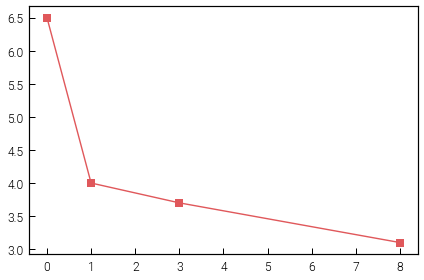

In [122]:
x = np.array([0.0, 1.0, 3.0, 8.0])
y = np.array([6.5, 4.0, 3.7, 3.1])

fig, ax = plt.subplots()
ax.plot(x,y,'s-');

We use different kinds of interpolation, the simplest being [linear](https://en.wikipedia.org/wiki/Linear_interpolation), by creating an interpolating function:

In [89]:
f = interp1d(x, y, kind='linear')

We can then evaluate this function `f()` for any single value of $x$, or any numpy array $x$:

In [90]:
f(0.5)

array(5.25)

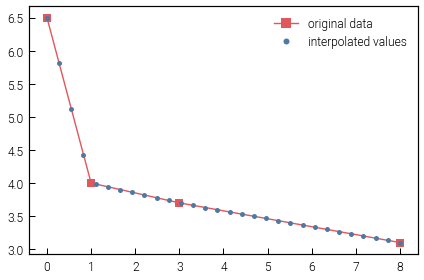

In [95]:
fig, ax = plt.subplots()

ax.plot(x,y,'s-',label='original data')

xx = np.linspace(x.min(), x.max(), 30)
ax.plot(xx, f(xx), 'o', markersize=5.0, label='interpolated values')

ax.legend();

By default, requesting interpolation outside the original range of the $x$ data values (extrapolation) raises an error.

In [97]:
f(9)

ValueError: A value in x_new is above the interpolation range.

> /home/dnelson/.local/lib/python3.8/site-packages/scipy/interpolate/interpolate.py(691)_check_bounds()
    689                              "range.")
    690         if self.bounds_error and above_bounds.any():
--> 691             raise ValueError("A value in x_new is above the interpolation "
    692                              "range.")
    693 



ipdb>  exit


We can allow extrapolation:

In [98]:
f = interp1d(x, y, kind='linear', fill_value='extrapolate')

In [99]:
f(9)

array(2.98)

Instead of linear interpolation, we can also use higher-order methods, such as `quadratic` (second order) or `cubic` (third order).

> Note: Both of these are spline-based, meaning that polynomials of the given order are constructed between each pair of input points.

In [100]:
f = interp1d(x, y, kind='cubic')

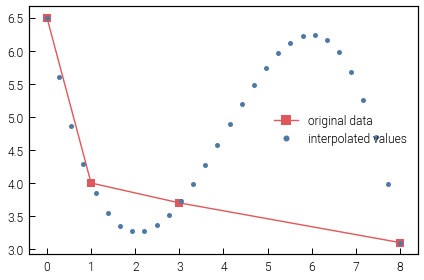

In [101]:
fig, ax = plt.subplots()

ax.plot(x,y,'s-',label='original data')

xx = np.linspace(x.min(), x.max(), 30)
ax.plot(xx, f(xx), 'o', markersize=5.0, label='interpolated values')

ax.legend();

Always **be careful when interpolating**, and check against overfitting, oscillations, and other poorly behaved results.

> You can also interpolate in higher dimensions: if the input points are regularly spaced (gridded), then in 2D with [interp2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp2d.html#scipy.interpolate.interp2d) or in arbitrary dimensions with [interpn](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interpn.html#scipy.interpolate.interpn).
>
> For "unstructured" data, e.g. irregular point clouds, then [griddata](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html#scipy.interpolate.griddata) uses significantly more complex methods.

### Exercise

Try quadratic interpolation on the same data. For this dataset, which of the three methods would you prefer?

In [124]:
# your solution here


## Numerical integration

Here we seek the answer for a discrete integral $\int_a^b f(x) dx$ of some function $f(x)$ over some range $(a,b)$. By "numerical" we mean that the answer is a number, as opposed to symbolic integration (in a program like Mathematica), which can compute the answer in terms of variables.

The main workhorse here is [scipy.integrate](https://docs.scipy.org/doc/scipy/tutorial/integrate.html), which implements many different standard approaches.

In general, you can either integrate:

* a python function `def f(x)` which returns values $y$ for any $x$.
* a discrete "function" which is defined by two numpy arrays $x$ and $y$.

In the first case, we can use the `quad(f,a,b)` function:

In [111]:
from scipy import integrate

In [105]:
def f(x):
    return x**2 + 3*x + 1.2

In [109]:
integral, error = integrate.quad(f, 1.0, 2.0) # from a=1 to b=2

print(integral)

8.033333333333333


In the second case, we frequently only have measured data of a "function" sampled at some given points $x$.

* If the sampling is even, you can use `romb` (Romberg integration).
* If the sampling is uneven (arbitrary), you can use the `trapezoid` or `simpson` methods.

Let's create samples of the same function as above:

In [107]:
x = np.linspace(1.0, 2.0, 200)
y = x**2 + 3*x + 1.2

In [117]:
integrate.trapz(y,x) # renamed trapezoid() in more recent scipy versions

8.033337541981263

In [118]:
integrate.simps(y,x) # renamed simpson() in more recent scipy versions

8.033333354482318

### Exercise

Reduce the number of samples: when does the numerically computed integral start to diverge from the true value? Write a loop to identify the number of samples required to obtain 1\% accuracy. Plot the error versus the number of samples.

In [120]:
# your solution here


## Solving differential equations

We can compute the solution to [ordinary differential equations](https://en.wikipedia.org/wiki/Ordinary_differential_equation) (ODEs) using scipy.

> Remember that an ODE is a differential equation of functions of one variable $x$, and derivatives of those functions.
>
> The much more complex [partial differential equations](https://en.wikipedia.org/wiki/Partial_differential_equation) provide the foundation for our modern scientific understanding of many physical phenomena: sound, heat, diffusion, electrostatics, electrodynamics, thermodynamics, fluid dynamics, elasticity, general relativity, and quantum mechanics (Schrodinger equation, Pauli equation, etc). Such "solvers" become expensive and complex, especially in two or more dimensions.

In [ ]:
# TODO

## Other libraries

In addition to numpy, matplotlib, and scipy, there are many other Python libraries for scientific data analysis which may be useful:

* [pandas](https://pandas.pydata.org/) - with `DataFrame`, to load/manipulate/search data which is structured like tables.
* [astropy](https://www.astropy.org/) - domain specific, for astronomy and astrophysics.
* ... - domain specific, for your field.

<hr style="border:2px solid #bbb; margin: 30px 0"> </hr>

# Day 4 Practice Problem - ...

# Day 4 Challenge Problem - ...